# Analiza podatkov o viskijih

V tej datoteki bom s knjižnico pandas analiziral podatke o viskijih

### Naložimo pandas in podatke

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20

%matplotlib inline


viski = pd.read_csv("viski.csv")

Poglejmo si nekaj podatkov

In [32]:
viski

,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene
0,60,Woodford Reserve Master’s Collection Five Malt,45.20,American Blended Whiskey,50.0,"Four barley types—two row, pale chocolate, kil...",Fred Minnick,Fall 2016
1,60,Cavalry,45.00,Bourbon/Tennessee,30.0,"Although it’s not on the label, Cavalry uses t...",Fred Minnick,Spring 2016
2,63,Distillery Select 'Inchmoan' (distilled at Loc...,NaN,Single Malt Scotch,60.0,"Fiery peat kiln smoke, tar, and ripe barley on...",John Hansell,Fall 2007
3,65,Chinook Limited Edition Signature Rye Whisky,44.90,Canadian,17.0,With its overt floral perfume notes and the sc...,Davin de Kergommeaux,Winter 2015
4,65,Iowa Legendary Rye,40.00,Craft Whiskey,35.0,"An unaged whiskey from Carroll County, Iowa, w...",Geoffrey Kleinman,Summer 2015
5,67,American Born Dixie Sweet Tea Moonshine,41.50,Flavored Whisky & Liqueurs,22.0,This flavored moonshine smells like a mass of ...,Geoffrey Kleinman,Fall 2014
6,67,Southern Comfort Fiery Pepper,35.00,Flavored Whisky & Liqueurs,17.0,Does a nose of bright bubble gum and fresh-cut...,Lew Bryson,Spring 2012
7,68,Freedom Moonshine Apple Pie Rye,20.00,Flavored Whisky & Liqueurs,20.0,The aromas from the base rye moonshine complem...,Geoffrey Kleinman,Winter 2014
8,68,Southern Shine Blueberry Moonshine,50.00,Flavored Whisky & Liqueurs,16.0,All of the elements that work with Southern Sh...,Geoffrey Kleinman,Fall 2014
9,69,Cabin Fever,40.00,Flavored Whisky & Liqueurs,21.0,"Real maple syrup has an earthy, woodsy aroma; ...",Davin de Kergommeaux,Summer 2014


### Analiza
**Najprej si poglejmo razpored po kategorijah**

In [33]:
viski_kategorije = viski.groupby("kategorija")

In [34]:
viski_kategorije["ime"].count().sort_values(ascending=False)

kategorija
Single Malt Scotch                  1971
Bourbon/Tennessee                    652
Craft Whiskey                        385
Blended Scotch Whisky                257
Canadian                             256
Rye Whiskey                          177
Blended Malt Scotch Whisky           171
Japanese                             101
Irish                                 98
Flavored Whisky & Liqueurs            62
                                    ... 
English Grain Spirit                   2
Straight Corn Whiskey                  2
Single Malt Belgian Whisky             2
English Blended Whisky                 1
Blended Belgian Whisky                 1
Bhutanese Whisky                       1
Poitín                                 1
Netherlands Whisky                     1
Icelandic Whisky and Malt Spirit       1
Single Grain Belgian Whisky            1
Name: ime, Length: 59, dtype: int64

Kot kaže je kategoriziranje viskija precej zapleteno, saj je ta odvisna od sestavin, izvora in procesa izdelave. Ceprav vidimo kar 59 razlicnih kategorij, pa 90% viskijev spada v eno izmed 15 najbolj pogostih kategorij:

In [35]:
vseh_skupaj = viski_kategorije["ime"].count().sort_values(ascending=False).sum()
prvih_15 = viski_kategorije["ime"].count().sort_values(ascending=False).head(n=15).sum()
prvih_15 / vseh_skupaj 

0.8926680244399186

Najbolj pogosta kategorija pa prihaja iz Škotske, kar je pričakovati glede na to da so viski izumili prav tam.

Sortiranje na bolj splošne kategorije npr. po državah bi bilo na podlagi danih kategorij zelo tezko, saj iz kategorije "Craft Whiskey" ali "Rye Whiskey" ne moremo sklepati izvora. Namesto tega si poglejmo le azpored po cenah, ocenah in alkoholu.

In [36]:
viski_kategorije.mean().sort_values(by='cena', ascending=False)

,ocena,alkohol,cena
kategorija,,,
Blended Scotch Whisky,87.603113,42.685654,882.469880
Single Malt Scotch,86.895485,48.325676,548.488301
Grain Scotch Whisky,86.555556,50.154545,278.259259
Danish,84.250000,51.187500,248.875000
Miscellaneous,85.750000,49.280000,222.437500
Irish Single Malt,89.983051,44.284746,220.338983
Single Grain Whisky,85.524590,50.465574,213.049180
Taiwanese Whisky,90.115385,52.250000,201.230769
Single Malt American Whiskey,85.687500,47.950000,200.250000


In [37]:
viski_kategorije.mean().sort_values(by='ocena', ascending=False)

,ocena,alkohol,cena
kategorija,,,
Irish Single Pot Still,92.791667,49.004348,178.083333
Blended Grain Scotch Whisky,90.500000,48.150000,195.000000
Taiwanese Whisky,90.115385,52.250000,201.230769
Irish Single Malt,89.983051,44.284746,220.338983
Single Grain Scotch,89.357143,47.907143,180.000000
Indian Whisky,88.923077,51.983243,118.589744
World Whisky,88.785714,46.800000,91.214286
Dutch,88.700000,46.850000,85.300000
English Grain Spirit,88.500000,43.000000,62.500000


Med cenejšimi vidimo veliko kategorij, ki se pojavijo le enkrat.
Najcenejši Poitin v resnici sploh ne spada med viskije, nad njim pa so 
viskiji z okusom, ki tudi niso čisto pravi viski. Ti kategoriji se pojavita
tudi med najslabše ocenjenimi. 

Večina najslabše ocenjenih kategorij je povprečno cenejših od 60 dolarjev.

Prvi dve med najdražjimi sta tudi med štirimi najbolj zastopanimi kategorijami, vendar pa nista med najbolj ocenjenimi. Verjetno hoče vsak prodajati drage viskije, narediti jih še dobre pa je malo težje. 

Najboljše ocenjeni se gibljejo med ceno 175 - 200 dolarjev, kar kaže da je za kakovost res treba malo več plačati.


In [38]:
viski_kategorije.mean().sort_values(by='alkohol', ascending=False)

,ocena,alkohol,cena
kategorija,,,
Straight Corn Whiskey,83.500000,54.450000,34.000000
Taiwanese Whisky,90.115385,52.250000,201.230769
Indian Whisky,88.923077,51.983243,118.589744
Danish,84.250000,51.187500,248.875000
Single Grain Whisky,85.524590,50.465574,213.049180
Grain Scotch Whisky,86.555556,50.154545,278.259259
Rye Whiskey,87.807910,49.956582,78.739884
Bourbon/Tennessee,88.154908,49.581584,75.759690
Single Malt English Whisky,85.107143,49.514815,104.178571


Vse kategorije povprečje vsebnosti alkohola nad 40%, razen viskijev z okusom.
Med tistimi z največ alkohola pa je Tajvanski viski, ki ima tudi visoko
povprečno oceno. Ali obstaja povezava med %alkohola in oceno bomo raziskali
kasneje.

**Katere ocene pa sploh so dobre?**

In [39]:
viski_ocene = viski.groupby("ocena").size()
viski_ocene

ocena
60      2
63      1
65      2
67      2
68      2
69      2
70      7
71      5
72     12
73     13
     ... 
88    459
89    393
90    449
91    279
92    285
93    208
94    111
95     72
96     45
97      4
Length: 34, dtype: int64

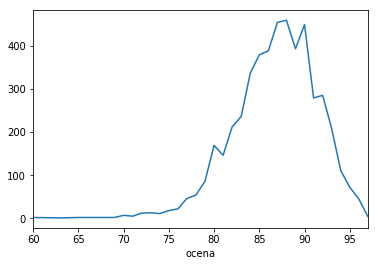

In [40]:
viski_ocene.plot()

Iz grafa in tabele vidimo, da se večina ocen giblje med 80 in 97 točkami. 
V tem območju dobimo skoraj pričakovano normalno porazdelitev z vrhom pri 88, zanimiv je morda le padec pri 89.
Verjetno gre to pripisati subjektivni naravi ocenjevanja viskija in temu,da je ocena morda 89 nehvaležna, say je tik pod "desetko" (kot na fakulteti).

**Ali je ocena odvisna od cene?**

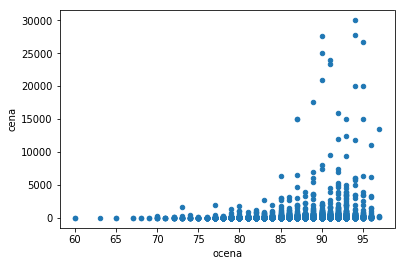

In [67]:
viski[viski['cena'] < 50000].plot.scatter('ocena', 'cena')

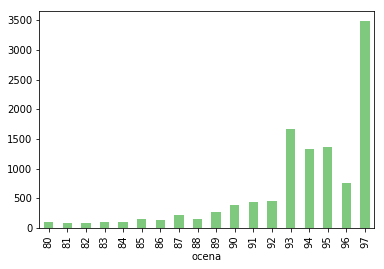

In [52]:
viski_ocene = viski[viski['ocena'] > 79].groupby('ocena')
viski_ocene['cena'].mean().plot.bar(colormap='Accent')

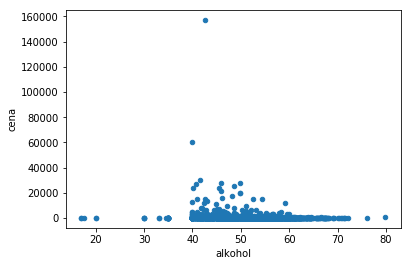

In [53]:
viski.plot.scatter('alkohol', 'cena')

Poglejmo še viskije cenejše od 1000$, da bo graf bolj pregleden

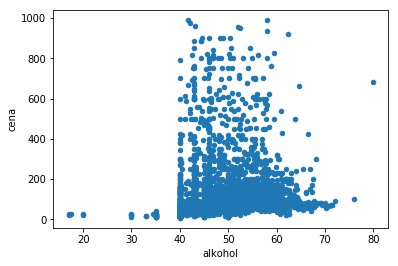

In [54]:
viski[viski['cena'] < 1000].plot.scatter('alkohol', 'cena')

Vidimo, da odvisnosti med ceno in vsebnostjo alkohola ni, večina viskijev pa se nahaja v območju med  40%- 60% alkohola.
Izgleda pa, da je meja 40% zelo stroga, vsebnost alkohola pod 60% pa zgolj priporočilo.

Pa si poglejmo viskije z manj kot 40% alkohola.

In [55]:
pod_40 = viski[viski['alkohol'] < 40].groupby("kategorija")
pod_40['ime'].count().sort_values(ascending=False)

kategorija
Flavored Whisky & Liqueurs    24
Canadian                       1
American Blended Whiskey       1
Name: ime, dtype: int64

Pričakovali smo, da bomo našli viskije z okusom, vendar sta tu še dve izjemi.
Poglejmo ju bolj podrobno

In [56]:
viski[(viski['alkohol'] < 40) & (viski['kategorija'] == 'American Blended Whiskey') | (viski['kategorija'] == 'Canadian') & (viski['alkohol'] < 40) ]

,ocena,ime,alkohol,kategorija,cena,opis,ocenjevalec,cas_ocene,leto,mesec
15,70,Fireball Cinnamon Whisky,33.0,Canadian,16.0,It does say “whisky” on the label...followed b...,Lew Bryson,Winter 2011,2011,Winter
124,77,Black Eagle Honey,35.0,American Blended Whiskey,12.0,"Odd aroma, more like a weedy, aromatic bark th...",Lew Bryson,Fall 2013,2013,Fall


In [57]:
viski.iloc[15]['opis']

"It does say “whisky” on the label...followed by “with natural cinnamon flavor.” It's clear from the first sniff that this is a one-trick pony: hot, fiery cinnamon. But is there whisky flavor in there? Fireball's as sweet as the liqueur proof would indicate, and as hot as advertised, and there's only a hint of whisky character under the fire. A novelty for tailgating; probably great in hot chocolate. "

Iz opisa je razvidno da tudi ta spada v kategorijo Flavored Whisky, torej gre le za napačno kategoriziranje.

In [58]:
viski.iloc[124]['opis']

'Odd aroma, more like a weedy, aromatic bark than honey; wonder what the bees were gathering from? Very sweet, on the rich and cloying side, but without the real honey character that makes Jack Daniel’s Honey the best of this bunch, and I can’t get over the aroma. The only saving grace is that even at 35%, the bourbon still manages to peek through; it’s not enough.'

Kot kaže gre pri tem za neuspel eksperiment izven norme. Vendar pa ocenjevalec komentira, da alkohol pride na plan kljub nizki vsebnosti. 

In [60]:
viski_ocenjevalec = viski.groupby("ocenjevalec")
viski_ocenjevalec['ocenjevalec'].count().sort_values(ascending=False)

ocenjevalec
John Hansell              1117
Jonny McCormick            847
Gavin Smith                824
Dave Broom                 508
Lew Bryson                 372
Dominic Roskrow            242
Davin de Kergommeaux       231
Fred Minnick               189
Susannah Skiver Barton     187
Jeffery Lindenmuth         186
Geoffrey Kleinman           93
David Fleming               92
Adam Polonski               22
Name: ocenjevalec, dtype: int64

In [61]:
viski_ocenjevalec.mean().sort_values(by='ocena', ascending=False)

,ocena,alkohol,cena
ocenjevalec,,,
David Fleming,88.293478,49.276703,92.619565
Adam Polonski,88.136364,49.568182,66.809524
Jonny McCormick,87.795750,45.797630,182.110979
Gavin Smith,87.514563,47.541830,678.621490
Susannah Skiver Barton,87.427807,47.052174,58.955056
John Hansell,87.295434,48.260887,252.545699
Jeffery Lindenmuth,87.112903,48.629670,81.527473
Fred Minnick,86.835979,50.536346,107.611702
Dominic Roskrow,86.181818,47.372414,108.421488


Za konec pa poglejmo še kakšen vpliv ima čeas ocene

In [41]:
viski_cas = viski.groupby("cas_ocene")

In [42]:
viski['leto'] = viski.cas_ocene.replace(to_replace="Fall|Spring|Winter|Summer", value="",inplace=False, limit=None, regex=True, method='pad')

In [43]:
viski['mesec'] = viski.cas_ocene.replace(to_replace="\d\d\d\d", value="",inplace=False, limit=None, regex=True, method='pad')

In [62]:
viski_leto = viski.groupby("leto")
viski_mesec = viski.groupby("mesec")
viski_mesec['mesec'].count().sum()

4910

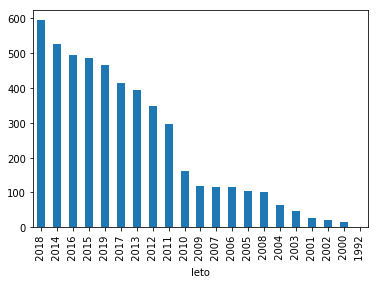

In [47]:
viski_leto.size().sort_values(ascending=False).plot.bar(y='stevilo reviewov')

Vidimo, da je stran Whiskey advocate izrazito bolj aktivna od leta 2010 naprej. Mogoče ta stran sploh se ni obstajala pred letom 2010, in so ocene naknadno prepisali iz revije, ki so jo izdajali ze prej, vendar je to zgolj ugibanje. Tudi na internetu nisem zasledil podatkov o času delovanja spletne strani, ali revije.
Možno pa je tudi, da je povpraševanje to taki obliki ocenjevanja viskija v zadnjih petih letih močno naraslo.

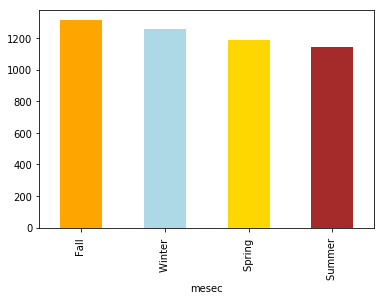

In [48]:
viski_mesec.size().sort_values(ascending=False).plot.bar(color=['orange', 'lightblue', 'gold',
                                                          'brown'])

Izkaže se, da je število ocenjevanj viskijev neodvisno od letnega časa

In [49]:
viski_mesec.mean().sort_values(by='cena', ascending=False)

,ocena,alkohol,cena
mesec,,,
Summer,86.707062,46.844888,399.916300
Spring,86.989057,47.705280,347.303480
Winter,86.994453,47.666281,273.470916
Fall,86.456207,47.294759,269.514482


Ocena in alkohol prakticno sta enaka ne glede na mesec, zanimivo je morda le odstopanje cene. Morda res dragi viskiji
kvarijo povprečje, saj v spodnji razpredelnici vidimo, da je bil (daleč)najdražji viski ocenjen prav poleti. Ker je bilo 
najmanj viskijev ocenjenih poleti, je ta presežek še bolj vpliven.
